# Les séries temporelles avec Python (2/4)

## Un exemple de visualisation : le nombre de vélos à Paris Montparnasse

On va terminer sur un petit exemple un peu plus parlant, ou en tout cas, un peu moins financier : on va regarder le nombre de vélo passés par un des compteurs de la ville de Paris, situé sur le boulevard Montparnasse. Le jeu de données vient [de là](https://opendata.paris.fr/explore/dataset/comptage-velo-donnees-compteurs/information/?disjunctive.id_compteur&disjunctive.nom_compteur&disjunctive.id&disjunctive.name). Le décompte horaire des vélos peut ainsi être récupéré.

**"Petit" exo :**
1. Importer le dataset
2. Le nettoyer un peu : supprimer les colonnes inutiles, modifier les entêtes à rallonge, gérer les formats de dates (tout ça peut être fait dans à l'aide des paramètres de `read_csv`)
3. Définir, si ce n'est pas déjà fait, la série temporelle des décomptes horaires de vélos et l'afficher
4. Ne conserver que les données après la zone de valeurs manquantes début 2019
5. Regarder quelques statistiques générales avec un `describe`
6. Visualisation de la tendance :
>- la série par heure étant trop "dense" pour être clairement lisible, on va diminuer la fréquence : utiliser `resample` pour faire la somme des vélos sur une journée et sur une semaine puis réafficher les deux séries obtenues dans une même figure sur deux objets `axes` différents. Commentez le graphique ainsi obtenu.
>- à l'aide de la méthode `rolling` calculer la moyenne mobile mensuelle (donc sur 30 jours !). Le refaire avec le paramètre `win_type="gaussian"` et superposer les deux séries sur un même graphique.
8. Après avoir vu la tendance, on veut regarder la répartition quotidienne et hebdomadaire du trafic :
>- à l'aide de la méthode `groupby` ainsi que des attributs `time` et `dayofweek` des objets `DatetimeIndex`, calculer le nombre moyen de vélos décomptés pour chaque heure de la journée et pour chaque jour de la semaine. Afficher les 2 séries obtenues et les commenter
>- enfin, plus compliqué pour terminer, regarder les nombres moyens de vélos par heure de la journée selon qu'on est un jour ouvrable ou jour de weekend et afficher les 2 séries puis les commenter.

In [41]:
velo = pd.read_csv('data/comptage-velo-montpar.csv', sep=';',
                   names=["nb", "date"], header=0,
                   usecols=[4,5])
velo.head(10)

,nb,date
0,75,2019-04-25T09:00:00+02:00
1,101,2019-04-25T19:00:00+02:00
2,0,2019-04-27T05:00:00+02:00
3,27,2019-04-27T11:00:00+02:00
4,24,2019-04-27T16:00:00+02:00
5,29,2019-04-28T20:00:00+02:00
6,75,2019-04-29T09:00:00+02:00
7,103,2019-04-29T18:00:00+02:00
8,19,2019-04-29T23:00:00+02:00
9,77,2019-04-30T09:00:00+02:00


In [42]:
pd.DatetimeIndex(pd.to_datetime(velo.date, utc=True)).tz_convert('Europe/Paris').tz_localize(None)

DatetimeIndex(['2019-04-25 09:00:00', '2019-04-25 19:00:00',
               '2019-04-27 05:00:00', '2019-04-27 11:00:00',
               '2019-04-27 16:00:00', '2019-04-28 20:00:00',
               '2019-04-29 09:00:00', '2019-04-29 18:00:00',
               '2019-04-29 23:00:00', '2019-04-30 09:00:00',
               ...
               '2019-04-25 05:00:00', '2019-04-25 21:00:00',
               '2019-04-28 21:00:00', '2019-04-30 19:00:00',
               '2019-05-01 10:00:00', '2019-05-04 02:00:00',
               '2019-05-05 12:00:00', '2019-05-06 10:00:00',
               '2019-05-07 12:00:00', '2019-05-07 15:00:00'],
              dtype='datetime64[ns]', name='date', length=19391, freq=None)

In [43]:
velo = pd.read_csv('data/comptage-velo-montpar.csv', sep=';',
                   names=["nb", "date"], header=0,
                   usecols=[4,5],
                   index_col="date",
                   parse_dates=False,
                   date_parser=lambda s: pd.to_datetime(s.split("+")[0])
                  )
velo.head()

,nb
date,
2019-04-25 09:00:00,75
2019-04-25 19:00:00,101
2019-04-27 05:00:00,0
2019-04-27 11:00:00,27
2019-04-27 16:00:00,24


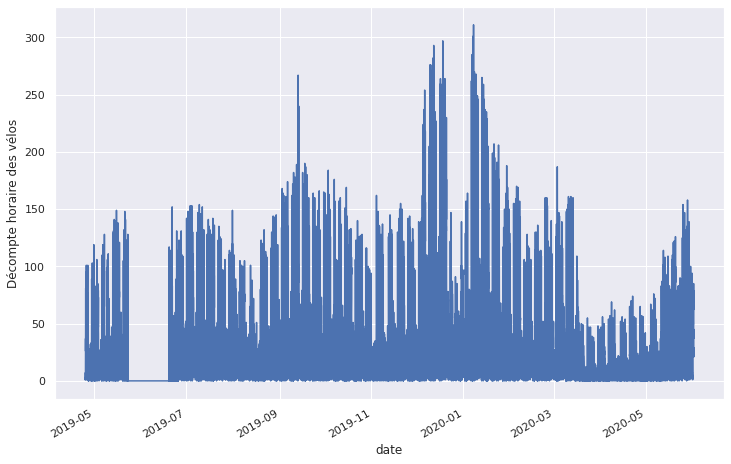

In [44]:
velo.plot(legend=False)
plt.ylabel('Décompte horaire des vélos');

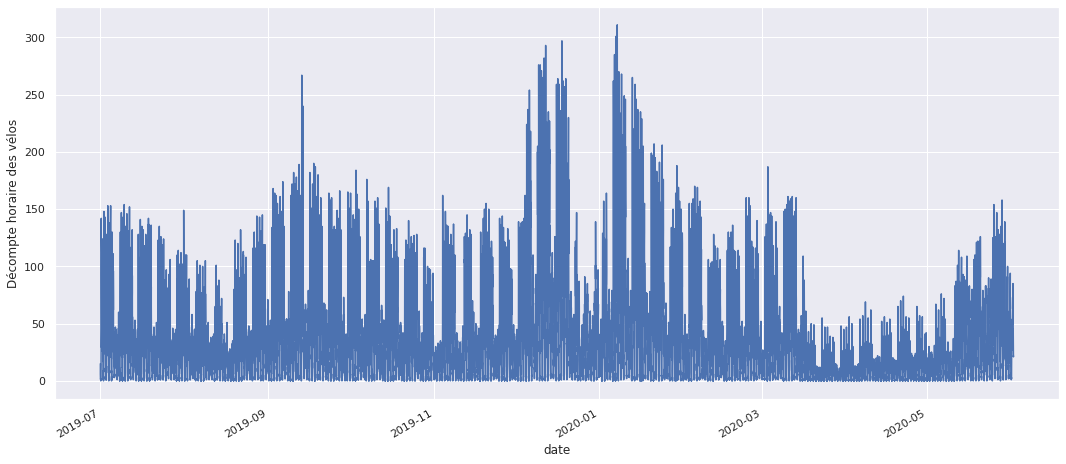

In [45]:
velo = velo["2019-07":]
velo.plot(legend=False, figsize=(18,8))
plt.ylabel('Décompte horaire des vélos');

In [46]:
velo.describe()

,nb
count,16175.000000
mean,34.649645
std,38.728829
min,0.000000
25%,7.000000
50%,23.000000
75%,47.000000
max,311.000000


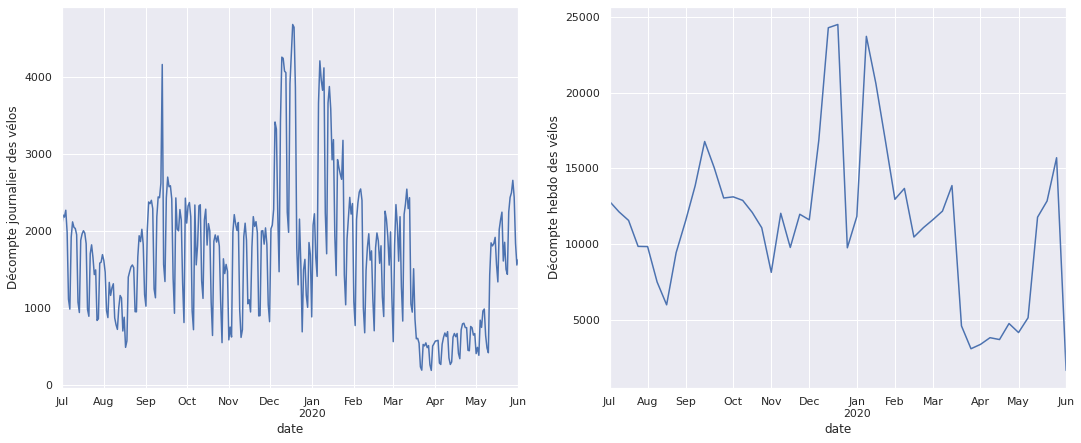

In [47]:
fig, ax = plt.subplots(1,2,figsize=(18,7))

velo_jr =  velo.resample('D').sum()
velo_jr.plot(ax=ax[0], legend=False)
ax[0].set_ylabel('Décompte journalier des vélos');

velo_sem =  velo.resample('W').sum()
velo_sem.plot(ax=ax[1], legend=False)
ax[1].set_ylabel('Décompte hebdo des vélos');

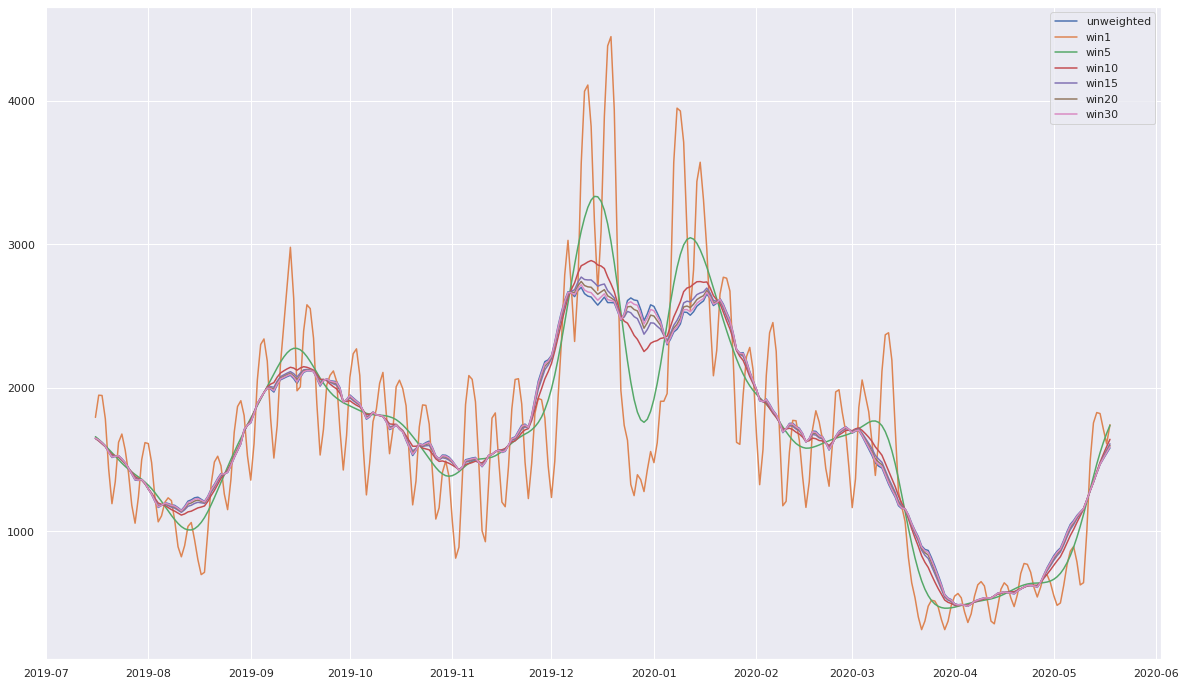

In [48]:
plt.figure(figsize=(20,12))
plt.plot(velo_jr.rolling(30, center=True).mean(),label="unweighted")
#ax=plt.gca()
for std in [1,5,10,15,20,30]:
    plt.plot(velo_jr.rolling(30, center=True, win_type='gaussian').mean(std=std), label=f"win{std}")

plt.legend(loc='best');

In [49]:
velo.index.dayofweek

Int64Index([0, 0, 0, 3, 3, 4, 4, 5, 0, 0,
            ...
            4, 4, 5, 5, 6, 6, 6, 6, 6, 0],
           dtype='int64', name='date', length=16175)

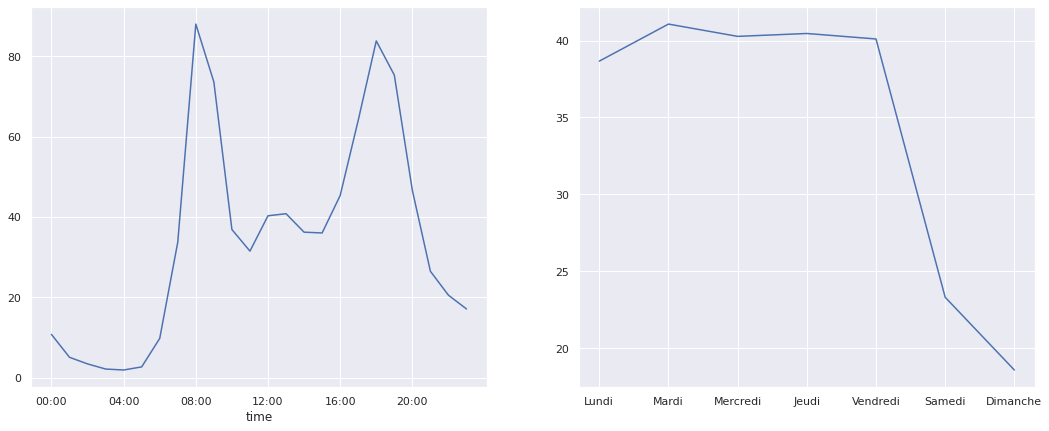

In [50]:
fig, ax = plt.subplots(1,2,figsize=(18,7))

par_hr = velo.groupby(velo.index.time).mean()
heures = 4 * 60 * 60 * np.arange(6)
par_hr.plot(ax=ax[0], xticks=heures, legend=False);

par_sem = velo.groupby(velo.index.dayofweek).mean()
par_sem.index = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
par_sem.plot(ax=ax[1], legend=False);

In [51]:
jours_ouvrables = np.where(velo.index.weekday < 5, 'Ouvrable', 'Weekend')
par_hr = velo.groupby([jours_ouvrables, velo.index.time]).mean()

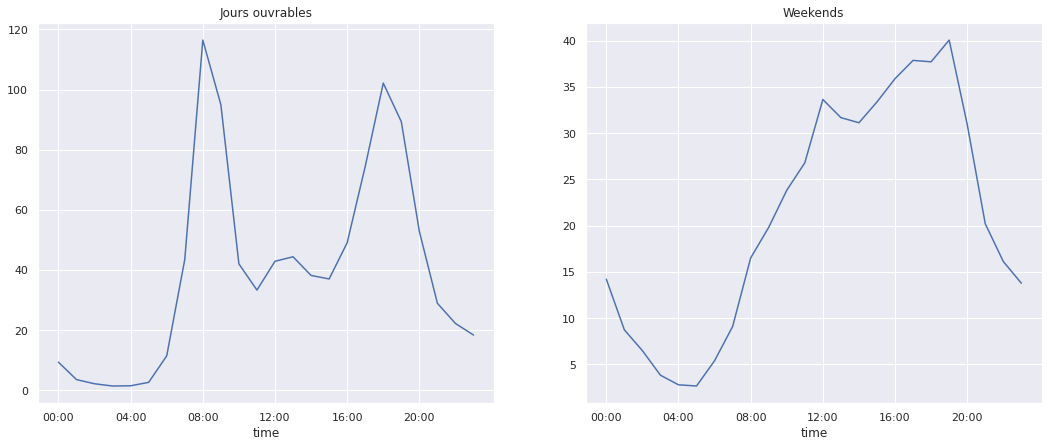

In [52]:
fig, ax = plt.subplots(1,2,figsize=(18,7))
par_hr.loc['Ouvrable'].plot(ax=ax[0], title='Jours ouvrables', xticks=heures, legend=False)
par_hr.loc['Weekend'].plot(ax=ax[1], title='Weekends', xticks=heures, legend=False);